# 3. Plotting for Exploratory data analysis (EDA) HABERMAN

In [56]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
#for removing warnings
warnings.filterwarnings("ignore")

'''haberman data set'''
#Load haberman.csv into a pandas dataFrame.
haberman = pd.read_csv("haberman.csv")
#printing initial 10 data
print(haberman.head(10))


   age  year  nodes  status
0   30    64      1       1
1   30    62      3       1
2   30    65      0       1
3   31    59      2       1
4   31    65      4       1
5   33    58     10       1
6   33    60      0       1
7   34    59      0       2
8   34    66      9       2
9   34    58     30       1


In [58]:
# (Q) how many data-points and features?
print (haberman.shape)
#print(haberman.describe())
#306 rows and 4 columns are present in dataset

(306, 4)


In [8]:
#(Q) What are the column names in our dataset?
print (haberman.columns)

Index(['age', 'year', 'nodes', 'status'], dtype='object')


In [9]:
#(Q) How many data points for each class are present? 
#(or) How many status are present?

haberman["status"].value_counts()
# balanced-dataset vs imbalanced datasets
#Haberman is a imbalanced dataset as the number of data points for every class is not balanced.

1    225
2     81
Name: status, dtype: int64

## since plotting in pair plot was taking status as its feature, therefore replaced "1" with "more" as patient has survived more than 5 years and "less" for "2" as patient died within 5 year unfortunately.

In [60]:
haberman = haberman.replace({'status': {1: 'more', 2: 'less'}});
# Printing head of dataframe just for verification
haberman.describe()

,age,year,nodes
count,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144
std,10.803452,3.249405,7.189654
min,30.000000,58.000000,0.000000
25%,44.000000,60.000000,0.000000
50%,52.000000,63.000000,1.000000
75%,60.750000,65.750000,4.000000
max,83.000000,69.000000,52.000000


# Observation

1. The dataset is unbalanced as number of points of two classes differ with huge amount.
2. The persons who are operated are between 30 and 83 age as shown in min and max. 
3. The operated years are between 58 and 69.

# (3.2) 2-D Scatter Plot

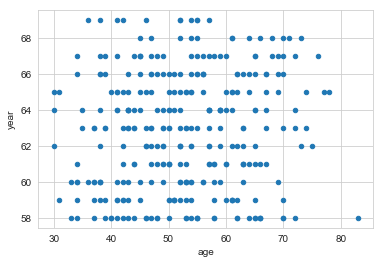

In [53]:
#2-D scatter plot:
#ALWAYS understand the axis: labels and scale.

haberman.plot(kind='scatter', x='age', y='year') ;
plt.show()

#cannot make much sense out it. 
#What if we color the points by thier class-label/status-type.

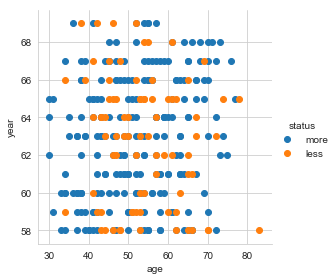

In [61]:
# 2-D Scatter plot with color-coding for each status type/class.
# Here 'sns' corresponds to seaborn. 
sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="status", size=4) \
   .map(plt.scatter, "age", "year") \
   .add_legend();
plt.show();


# How many cobinations exist? 3C2 = 3.

In [ ]:
**Observation(s):**
1. Using age and year we cannot clearly distinguished.

#  (3.3) Pair-plot

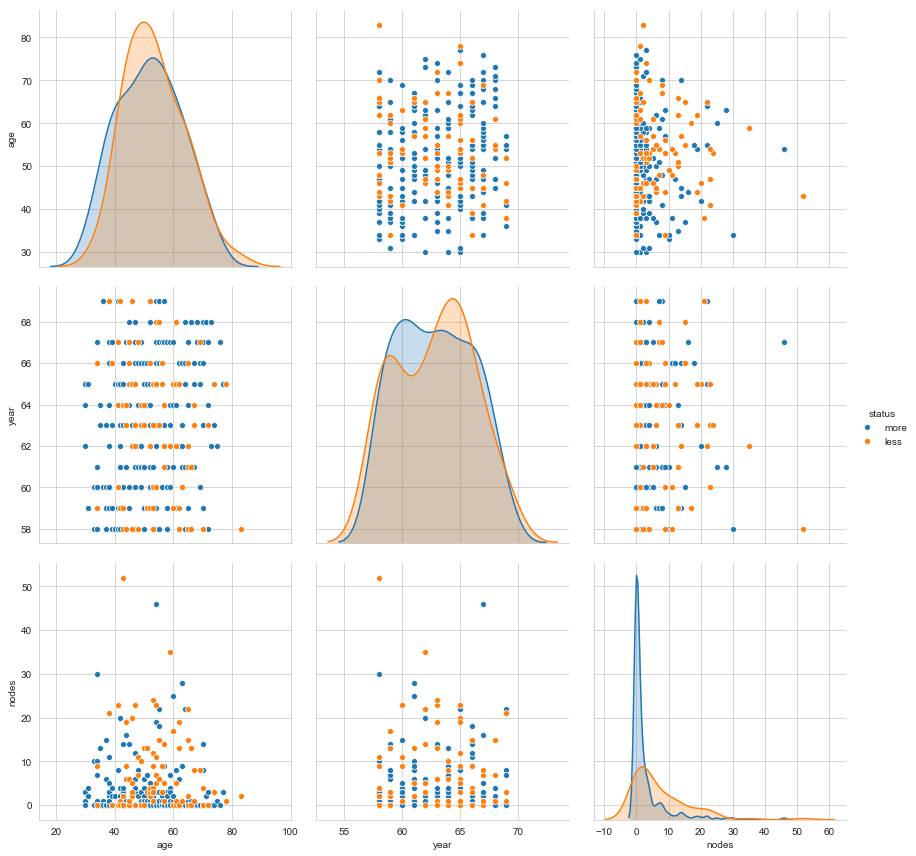

In [54]:
# pairwise scatter plot: Pair-Plot
# Dis-advantages: 
##Can be used when number of features are high.
##Cannot visualize higher dimensional patterns in 3-D and 4-D. 
#Only possible to view 2D patterns.
plt.close();
sns.set_style("whitegrid");
sns.pairplot(haberman, hue="status", size=4);
plt.show()
# NOTE: the diagnol elements are PDFs for each feature. PDFs are expalined below.

In [ ]:
**Observations**
1. we can see that this dataset is cannot be separated by line fully as data points are merged.
2. For classification the combination of yeat and nodes is better than others.

# (3.4) Histogram, PDF, CDF

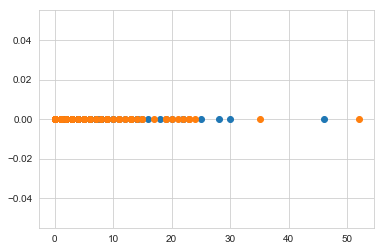

In [67]:
# What about 1-D scatter plot using just one feature?
#1-D scatter plot of petal-length
#haberman_yes is used as patient has survived 5 years or more
# haberman_no is used as patient has not survived 5 years
import numpy as np
haberman_yes = haberman.loc[haberman["status"] == "more"];
haberman_no = haberman.loc[haberman["status"] == "less"];

plt.plot(haberman_yes["nodes"], np.zeros_like(haberman_yes['nodes']), 'o')
plt.plot(haberman_no["nodes"], np.zeros_like(haberman_no['nodes']), 'o')

plt.show()
#Disadvantages of 1-D scatter plot: Very hard to make sense as points 
#are overlapping a lot.
#We cannot easily distinguished as points are in 1 D

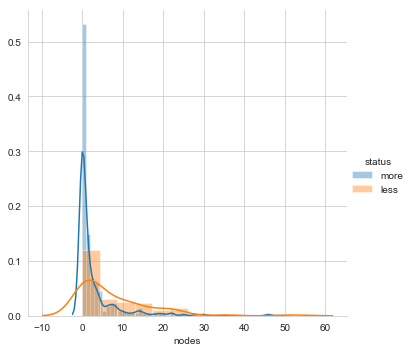

In [71]:
sns.FacetGrid(haberman, hue="status", size=5) \
   .map(sns.distplot, "nodes") \
   .add_legend();
plt.show();



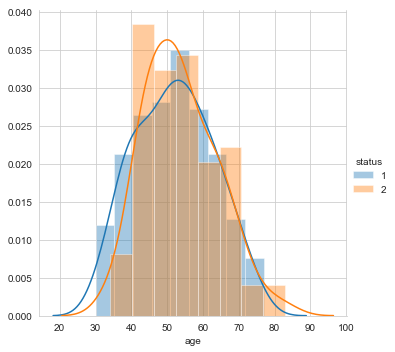

In [24]:
sns.FacetGrid(haberman, hue="status", size=5) \
   .map(sns.distplot, "age") \
   .add_legend();
plt.show();

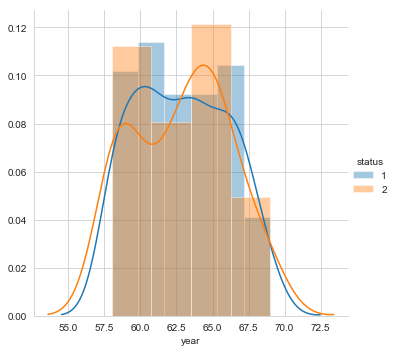

In [25]:
sns.FacetGrid(haberman, hue="status", size=5) \
   .map(sns.distplot, "year") \
   .add_legend();
plt.show();

In [69]:
print("Patients Survived Stats")
print(haberman_yes.describe())
print("Patients not Survived Stats")
print(haberman_no.describe())

Patients Survived Stats
              age        year       nodes
count  225.000000  225.000000  225.000000
mean    52.017778   62.862222    2.791111
std     11.012154    3.222915    5.870318
min     30.000000   58.000000    0.000000
25%     43.000000   60.000000    0.000000
50%     52.000000   63.000000    0.000000
75%     60.000000   66.000000    3.000000
max     77.000000   69.000000   46.000000
Patients not Survived Stats
             age       year      nodes
count  81.000000  81.000000  81.000000
mean   53.679012  62.827160   7.456790
std    10.167137   3.342118   9.185654
min    34.000000  58.000000   0.000000
25%    46.000000  59.000000   1.000000
50%    53.000000  63.000000   4.000000
75%    61.000000  65.000000  11.000000
max    83.000000  69.000000  52.000000


## Observations

1. By analysing distribution plots of various features we can conclude that node is better for classification, as there are less points merging in it, in comparisons with other two.

2. 50% of patients which survived have nodes = 0 and 75% of survivors have nodes less than 3.
3. 50% of patients which has not survived has nodes = 4 and 75% have nodes less than 11



[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


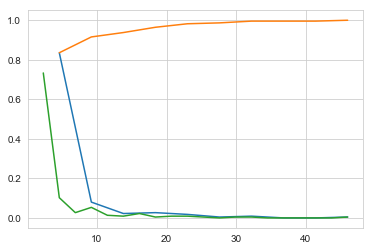

In [75]:
#since nodes attributes is useful, plotting cdf of nodes

counts, bin_edges = np.histogram(haberman_yes['nodes'], bins=10, 
                                 density = True)

pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)


counts, bin_edges = np.histogram(haberman_yes['nodes'], bins=20, 
                                 density = True)
pdf = counts/(sum(counts))
plt.plot(bin_edges[1:],pdf);

plt.show();


[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


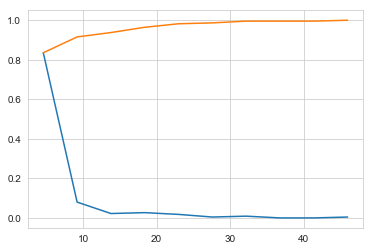

In [76]:
# Need for Cumulative Distribution Function (CDF)
# We can visually see what percentage patient with nodes value have survived.
#Plot CDF of nodes as it is useful for classfication.

counts, bin_edges = np.histogram(haberman_yes['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)



plt.show();

## observation

what percentage of patients with node values 20 has survived the operation, the answer is 97% as we can see in graph

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


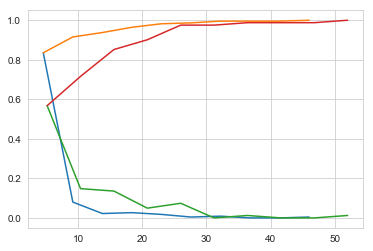

In [30]:
# Plots of CDF of node for patients which has survived and patients which has not survived.

# Misclassification error if you use petal_length only.

counts, bin_edges = np.histogram(haberman_yes['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


# haberman_no
counts, bin_edges = np.histogram(haberman_no['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)




plt.show();

# (3.5) Mean, Variance and Std-dev

In [40]:
#Mean, Variance, Std-deviation,  
print("Means:")
print(np.mean(haberman_yes["nodes"]))
#Mean with an outlier.
print(np.mean(np.append(haberman_yes["nodes"],50)));
print(np.mean(haberman_no["nodes"]))

print("\nStd-dev:");
print(np.std(haberman_yes["nodes"]))
print(np.std(haberman_no["nodes"]))





Means:
2.7911111111111113
3.0
7.45679012345679

Std-dev:
5.857258449412131
9.128776076761632


# (3.6) Median, Percentile, Quantile, IQR, MAD

In [44]:
#Median, Quantiles, Percentiles, IQR.
print("\nMedians:")
print(np.median(haberman_yes["nodes"]))
#Median with an outlier
print(np.median(np.append(haberman_yes["nodes"],50)));
print(np.median(haberman_no["nodes"]))


print("\nQuantiles:")
print(np.percentile(haberman_yes["nodes"],np.arange(0, 100, 25)))
print(np.percentile(haberman_no["nodes"],np.arange(0, 100, 25)))

print("\n90th Percentiles:")
print(np.percentile(haberman_yes["nodes"],90))
print(np.percentile(haberman_no["nodes"],90))


from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(haberman_yes["nodes"]))
print(robust.mad(haberman_no["nodes"]))



Medians:
0.0
0.0
4.0

Quantiles:
[0. 0. 0. 3.]
[ 0.  1.  4. 11.]

90th Percentiles:
8.0
20.0

Median Absolute Deviation
0.0
5.930408874022408


# (3.7) Box plot and Whiskers

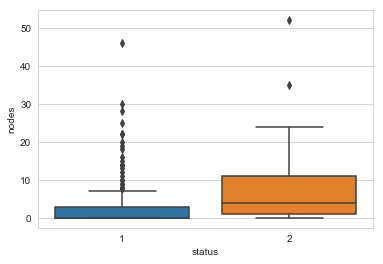

In [45]:

#Box-plot with whiskers: another method of visualizing the  1-D scatter plot more intuitivey.
# The Concept of median, percentile, quantile.
# How to draw the box in the box-plot?
# How to draw whiskers: [no standard way] Could use min and max or use other complex statistical techniques.
# IQR like idea.

#NOTE: IN the plot below, a technique call inter-quartile range is used in plotting the whiskers. 
#Whiskers in the plot below donot correposnd to the min and max values.

#Box-plot can be visualized as a PDF on the side-ways.

sns.boxplot(x='status',y='nodes', data=haberman)
plt.show()

# (3.8) Violin plots

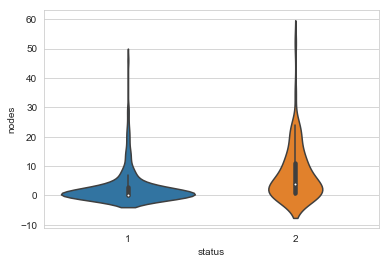

In [49]:
# A violin plot combines the benefits of the previous two plots 
#and simplifies them

# Denser regions of the data are fatter, and sparser ones thinner 
#in a violin plot

sns.violinplot(x="status", y="nodes", data=haberman, size=8)
plt.show()

# (3.11) Multivariate probability density, contour plot.


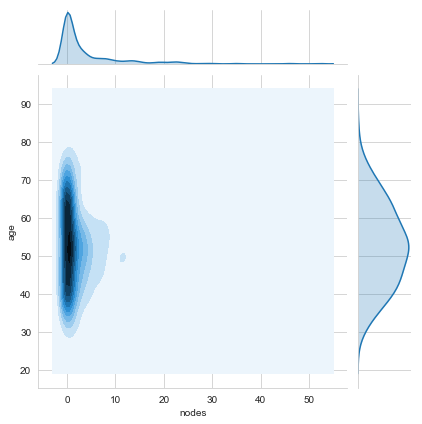

In [51]:
#2D Density plot, contors-plot
sns.jointplot(x="nodes", y="age", data=haberman, kind="kde");
plt.show();


# conclusion

1. The persons who are operated are between 30 and 83 age.
2. Most of the patients operated have less node values.
3. For classification the combination of year and nodes is better than others.
4. By looking at patients which has survived 75% have node values less than 3.
5. By looking at patients which has not survived 75% have node values less than 11.